In [1]:
#다음 사이트를 참고하여 구현함
#https://darkpgmr.tistory.com/117

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
%matplotlib inline
from numpy.random import randn

In [3]:
split = 3 #가로 세로 몇개로 나눌 것인지 설정

In [4]:
# 직사각형 점 4개의 3차원 좌표 설정
columns = ['xi', 'yi', 'zi']
index = ['A', 'B', 'C', 'D']
data = [[0, 0, 4], #A
        [0, 3, 5], #B
        [3, 3, 8], #C
        [3, 0, 1]] #D

In [5]:
# pandas dataFrame 객체로 데이터 변환
i = pd.DataFrame(data, columns=columns, index=index)

In [6]:
i

,xi,yi,zi
A,0,0,4
B,0,3,5
C,3,3,8
D,3,0,1


In [7]:
def draw(data):
    plt.rc('figure', figsize=(12, 12)) #이미지 출력 크기 조절
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data['xi'], data['yi'], data['zi'], c='r', marker='o')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

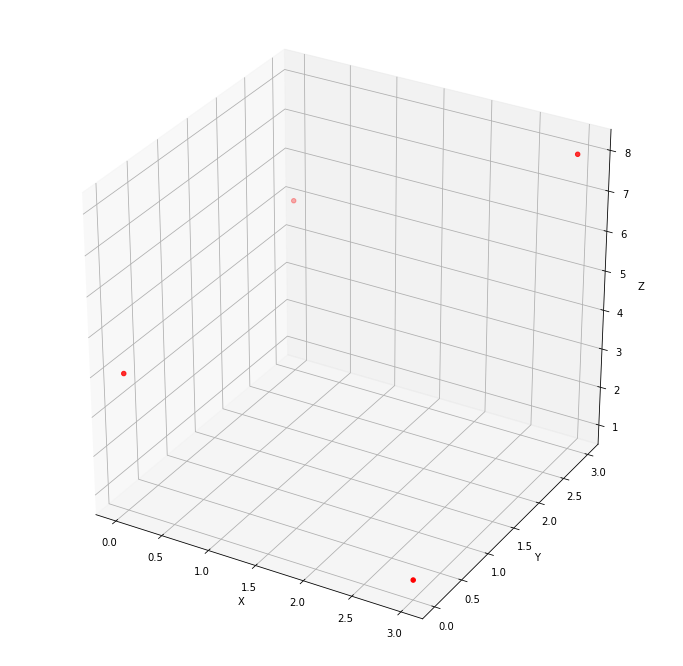

In [8]:
draw(i)

In [9]:
#선형보간 알고리즘
def bilinear_interpolation(z, alpha, beta, p, q):
    M = beta * z[0] + alpha * z[1]
    N = beta * z[3] + alpha * z[2]
    return q * M + p * N

In [10]:
a = np.zeros((split + 1, split + 1)) # 결과를 저장하는 2차원 배열을 4 * 4로 초기화
result_df = pd.DataFrame(columns=columns)

In [11]:
for x in range(split + 1):
    for y in range(split + 1):
        alpha = y / split
        beta = 1 - alpha
        p = x / split
        q = 1 - p
        result_z = bilinear_interpolation(i['zi'], alpha, beta, p, q)
        a[x, y] = result_z
        result_df.loc[len(result_df)] = [x, y, result_z]
a

array([[4.        , 4.33333333, 4.66666667, 5.        ],
       [3.        , 4.        , 5.        , 6.        ],
       [2.        , 3.66666667, 5.33333333, 7.        ],
       [1.        , 3.33333333, 5.66666667, 8.        ]])

In [12]:
result_df

,xi,yi,zi
0,0.0,0.0,4.000000
1,0.0,1.0,4.333333
2,0.0,2.0,4.666667
3,0.0,3.0,5.000000
4,1.0,0.0,3.000000
5,1.0,1.0,4.000000
6,1.0,2.0,5.000000
7,1.0,3.0,6.000000
8,2.0,0.0,2.000000
9,2.0,1.0,3.666667


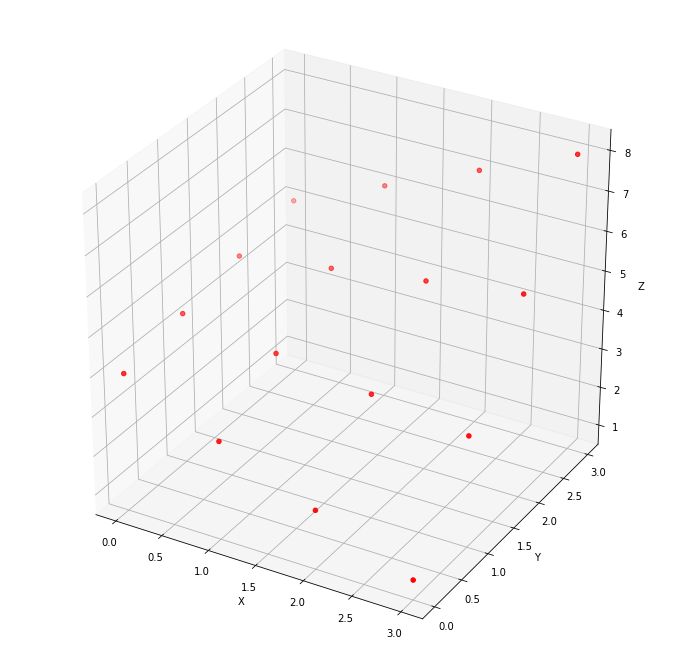

In [13]:
draw(result_df)